In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import pandas_datareader.data as web
from datetime import datetime
%env ALPHAVANTAGE_API_KEY = NTN3D6P6LIMZ6A2Q#alpha advantage api key

env: ALPHAVANTAGE_API_KEY=NTN3D6P6LIMZ6A2Q#alpha advantage api key


In [16]:
df = web.DataReader('KO', "av-daily-adjusted", 
                                        start=datetime(2015,1, 1), 
                                        end=datetime.today(),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
df['daily_return'] = df['adjusted close'].pct_change()*df['split coefficient']
# calculate cumluative return
df['cumluative_return'] = np.exp(np.log1p(df['daily_return']).cumsum())
df

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,daily_return,cumluative_return
2015-01-02,42.26,42.40,41.800,42.14,34.335313,9921011,0.0,1.0,NaN,NaN
2015-01-05,42.69,42.97,42.080,42.14,34.335313,26292592,0.0,1.0,0.000000,1.000000
2015-01-06,42.41,42.94,42.240,42.46,34.596046,16897487,0.0,1.0,0.007594,1.007594
2015-01-07,42.80,43.11,42.580,42.99,35.027886,13411970,0.0,1.0,0.012482,1.020171
2015-01-08,43.18,43.57,43.100,43.51,35.451577,21743628,0.0,1.0,0.012096,1.032511
...,...,...,...,...,...,...,...,...,...,...
2021-03-22,50.32,51.08,50.320,51.00,51.000000,17911391,0.0,1.0,0.003739,1.485351
2021-03-23,50.99,51.65,50.825,51.39,51.390000,16936692,0.0,1.0,0.007647,1.496710
2021-03-24,51.17,51.89,51.150,51.52,51.520000,14997373,0.0,1.0,0.002530,1.500496
2021-03-25,51.70,52.06,51.170,52.02,52.020000,17091938,0.0,1.0,0.009705,1.515058


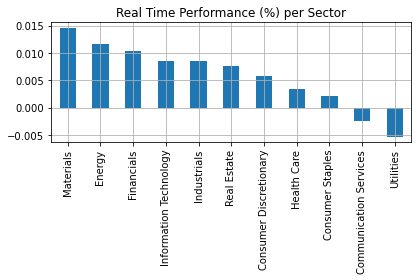

In [19]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [32]:
pd.to_datetime(df.index).year.min()

2015

In [5]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
import os
import pandas_datareader.data as web
from datetime import datetime
# Load Data
#df = web.DataReader('PYPL', "av-daily-adjusted", 
#                                        start=datetime(2021,1, 16), 
#                                        end=datetime(2021, 1, 16),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
#calculate daily returns
#df['daily_return'] = df['close'].pct_change()
# calculate cumluative return
#df['cumluative_return'] = np.exp(np.log1p(df['daily_return']).cumsum())
#df

app = JupyterDash(__name__)

# Build App
app.layout = html.Div([
    dcc.Input(id='ticker', type='text', value='AAPL'),
    html.Button(id='submit-button', n_clicks=0, children='Submit'),
    html.Div(id='output')
])

@app.callback(Output('output', 'children'),
              Input('submit-button', 'n_clicks'),
              State('ticker', 'value'))
def update_output(n_clicks, ticker):
    df = web.DataReader(ticker, "av-daily-adjusted", 
                                         start=datetime(2021,1, 1), 
                                         end=datetime.today(),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
    return u'''
        {} last closing price is {}
    '''.format(ticker, df.tail(1).close[0])

# Run app and display result inline in the notebook
app.run_server(mode='jupyterlab')

In [1]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas as pd
import numpy as np
import os
import pandas_datareader.data as web
from datetime import datetime
import plotly.graph_objects as go
%env ALPHAVANTAGE_API_KEY = NTN3D6P6LIMZ6A2Q#alpha advantage api key
#build app
app = JupyterDash(__name__)


# Load Data
df = web.DataReader('BABA', "av-daily-adjusted", 
                    start=datetime(2015,1, 1), 
                    end=datetime.today(),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
#calculate daily returns
df['daily_return'] = df['close'].pct_change()
# calculate cumluative return
df['cumluative_return'] = np.exp(np.log1p(df['daily_return']).cumsum())
    
daily_returns = px.histogram(df, x="daily_return")
candlestick = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
cumulative_returns = px.line(df, x=df.index, y="cumluative_return")
# Build App
app.layout = html.Div([
    dcc.Input(id = 'stock-ticker', value = 'BABA', type = 'text'),
    html.Button(id = 'submit-ticker', n_clicks = 0, children = 'Submit'),
    
    dcc.Graph(id='daily-returns-graph', figure=daily_returns),
    dcc.Graph(id='candlestick-graph', figure=candlestick),
    dcc.Graph(id='cumulative-returns-graph', figure=cumulative_returns),
    html.Br(),
    dcc.RangeSlider( id = 'year-slider',
                    marks={i: '{}'.format(i) for i in pd.to_datetime(df.index).year.unique()},
                    min=pd.to_datetime(df.index).year.min(),
                    max=pd.to_datetime(df.index).year.max(),
                    value=pd.to_datetime(df.index).year.unique())
])


@app.callback(Output(component_id='daily-returns-graph' , component_property= 'figure'),
              Output(component_id='candlestick-graph', component_property= 'figure'),
              Output(component_id='cumulative-returns-graph', component_property= 'figure'),
              Input('submit-ticker', 'n_clicks'),
              State('stock-ticker', 'value'))
def update_output(n_clicks, stock):
    df = web.DataReader(stock, "av-daily-adjusted", 
                                         start=datetime(2015,1, 1), 
                                         end=datetime.today(),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
    #calculate daily returns
    df['daily_return'] = df['close'].pct_change()
    # calculate cumluative return
    df['cumluative_return'] = np.exp(np.log1p(df['daily_return']).cumsum())
    
    daily_returns = px.histogram(df, x="daily_return")
    candlestick = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
    cumulative_returns = px.line(df, x=df.index, y="cumluative_return")
    return daily_returns, candlestick,cumulative_returns

# Run app and display result inline in the notebook
app.run_server(mode='jupyterlab')

env: ALPHAVANTAGE_API_KEY=NTN3D6P6LIMZ6A2Q#alpha advantage api key


In [14]:
#graph imports
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
#data imports
import pandas as pd
import numpy as np
import os
import pandas_datareader.data as web
from datetime import datetime
################################################################################
%env ALPHAVANTAGE_API_KEY = NTN3D6P6LIMZ6A2Q#alpha advantage api key



df = web.DataReader('BABA', "av-daily-adjusted", 
                    start=datetime(2015,1, 1), 
                    end=datetime.today(),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(external_stylesheets=[dbc.themes.SLATE])
app.layout = html.Div([
    dcc.RangeSlider(
        id='my-range-slider',
        min=pd.to_datetime(df.index).year.min(),
        max=pd.to_datetime(df.index).year.max(),
        step=1,
        updatemode='drag',
        value=pd.to_datetime(df.index).year.unique()),
    
    html.Div(id='output-container-range-slider')
])


@app.callback(
    dash.dependencies.Output('output-container-range-slider', 'children'),
    [dash.dependencies.Input('my-range-slider', 'value')])
def update_output(value):
    return 'You have selected "{}"'.format(value)


app.run_server(mode="external", port = '8060')

env: ALPHAVANTAGE_API_KEY=NTN3D6P6LIMZ6A2Q#alpha advantage api key
Dash app running on http://127.0.0.1:8060/


In [ ]:
@app.callback(Output(component_id='daily-returns-graph' , component_property= 'figure'),
              Output(component_id='candlestick-graph', component_property= 'figure'),
              Input('year-slider', 'children'),
             )
def update_output(years):
    #future tip, update the div which calls a function instead of replacing graph?
    df_sliced = df[years[0]:years[1]+1] 
    #calculate daily returns
    df_sliced['daily_return'] = df_sliced['close'].pct_change()
    # calculate cumluative return
    df_sliced['cumluative_return'] = np.exp(np.log1p(df_sliced['daily_return']).cumsum())
    
    
    
    daily_returns = px.histogram(df_sliced, x="daily_return").update_layout(
                                        template='plotly_dark',
                                        plot_bgcolor= 'rgba(0, 0, 0, 0)',
                                        paper_bgcolor= 'rgba(0, 0, 0, 0)',
                                    )
    candlestick = go.Figure(data=[go.Candlestick(x=df.index,
                open=df_sliced['open'],
                high=df_sliced['high'],
                low=df_sliced['low'],
                close=df_sliced['close'])]).update_layout(
                                        template='plotly_dark',
                                        plot_bgcolor= 'rgba(0, 0, 0, 0)',
                                        paper_bgcolor= 'rgba(0, 0, 0, 0)',
                                    )
   
    return daily_returns, candlestick

In [ ]:
df = web.DataReader('BIDU', "av_overview", 
                                         start=datetime.today(), 
                                         end=datetime.today(),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))
df

In [4]:
def adjust(date, close, adj_close, in_col, rounding=4):
    '''
    If using forex or Crypto - Change the rounding accordingly!
    '''
    try:
        factor = adj_close / close
        return round(in_col * factor, rounding)
    except ZeroDivisionError:
        print('WARNING: DIRTY DATA >> {} Close: {} | Adj Close {} | in_col: {}'.format(date, close, adj_close, in_col))
        return 0

In [10]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='YOUR_API_KEY',output_format='pandas', indexing_type='date')
# Get json object with the intraday data and another with  the call's metadata
df, meta_data = ts.get_daily_adjusted('BIDU', outputsize='full')

df['adj close'] = df['5. adjusted close']
df['adj open'] = np.vectorize(adjust)(df.index.date, df['4. close'], df['5. adjusted close'], df['1. open'])
df['adj high'] = np.vectorize(adjust)(df.index.date, df['4. close'], df['5. adjusted close'], df['2. high'])
df['adj low'] = np.vectorize(adjust)(df.index.date, df['4. close'], df['5. adjusted close'], df['3. low'])    
df.sort_index(ascending=True, inplace = True)
#calculate daily returns
df['daily_return'] = df['adj close'].pct_change()
# calculate cumluative return
df['cumluative_return'] = np.exp(np.log1p(df['daily_return']).cumsum())*10000

In [29]:
pd.to_datetime(df.index, unit = 's').max()

Timestamp('2021-03-26 00:00:00')

In [28]:
import time

In [33]:
df[pd.to_datetime(df.index).min():]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,adj close,adj open,adj high,adj low,daily_return,cumluative_return
date,,,,,,,,,,,,,,
2005-08-05,66.000,151.2100,60.00,122.54,12.254,22681100.0,0.0,1.0,12.254,6.600,15.1210,6.000,NaN,NaN
2005-08-08,137.750,153.9800,115.24,115.50,11.550,15488900.0,0.0,1.0,11.550,13.775,15.3980,11.524,-0.057451,9425.493716
2005-08-09,120.500,125.3000,95.69,96.10,9.610,8667700.0,0.0,1.0,9.610,12.050,12.5300,9.569,-0.167965,7842.337196
2005-08-10,101.000,103.5000,88.30,91.75,9.175,4963800.0,0.0,1.0,9.175,10.100,10.3500,8.830,-0.045265,7487.351069
2005-08-11,91.200,100.5000,90.60,97.90,9.790,7324800.0,0.0,1.0,9.790,9.120,10.0500,9.060,0.067030,7989.228007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,262.360,267.1500,256.68,266.13,266.130,8212810.0,0.0,1.0,266.130,262.360,267.1500,256.680,0.033635,217178.064306
2021-03-23,258.220,263.7100,249.20,261.55,261.550,15378707.0,0.0,1.0,261.550,258.220,263.7100,249.200,-0.017210,213440.509221
2021-03-24,258.120,260.0000,236.84,239.19,239.190,11833503.0,0.0,1.0,239.190,258.120,260.0000,236.840,-0.085490,195193.406235
